## **Inspired by Example 2.53 on Introduction to Probability Models by Sheldon Ross**
Consider a particle that moves along a set of m + 1 nodes, labeled 0, 1, . . . , m, that are arranged around a circle (see Figure 2.3). At each step the particle is equally likely to move one position in either the clockwise or counter- clockwise direction. That is, if Xn is the position of the particle after its nth step  where i + 1 ≡ 0 when i = m, and i − 1 ≡ m when i = 0. Suppose now that the particle starts at 0 and continues to move around according to the preceding rules until all the nodes 1, 2, . . . , m
have been visited. What is the probability that node i,i = 1,...,m, is the last one visited?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
# create stochastic process
class Stochastic_Graph:
  def __init__(self, m, prob_up):
    self.nodes = [i for i in range(m+1)]
    self.position = 0
    self.prob_up = prob_up
    self.not_visited = [i for i in range(1,m+1)]

  @property
  def position(self):
    return self._position

  @position.setter
  def position(self, value):
    if value in self.nodes:
      self._position = value
    else:
      raise ValueError(f"Position {value} need to be in {self.nodes}")

  def move(self, ret = True):
    self.position = np.mod(self.position + np.random.choice([-1,1], p=[1-self.prob_up, self.prob_up]),len(self.nodes))
    if self.position in self.not_visited: self.not_visited.remove(self.position)
    if ret: return self.position

  def check(self):
    if len(self.not_visited) == 0:
      return self.position

## **Probability for Ending Nodes**

In [210]:
# run one stochastic process
final_node = []
total, totals = 0,[]
prob = .5

for i in range(9000):
  positions = []
  stochastic_graph = Stochastic_Graph(8, prob)

  while stochastic_graph.check() == None:
    stochastic_graph.move(ret = False)
    total += 1

  totals.append(total)
  total = 0

  final_node.append(stochastic_graph.position)

In [211]:
# print probability of last node
unique, counts = np.unique(final_node, return_counts=True)
probs = dict(zip(unique, counts / len(final_node)))
print(probs)
print(np.mean(totals))

{1: 0.12033333333333333, 2: 0.12133333333333333, 3: 0.13, 4: 0.12655555555555556, 5: 0.12511111111111112, 6: 0.12688888888888888, 7: 0.12411111111111112, 8: 0.12566666666666668}
36.13355555555555


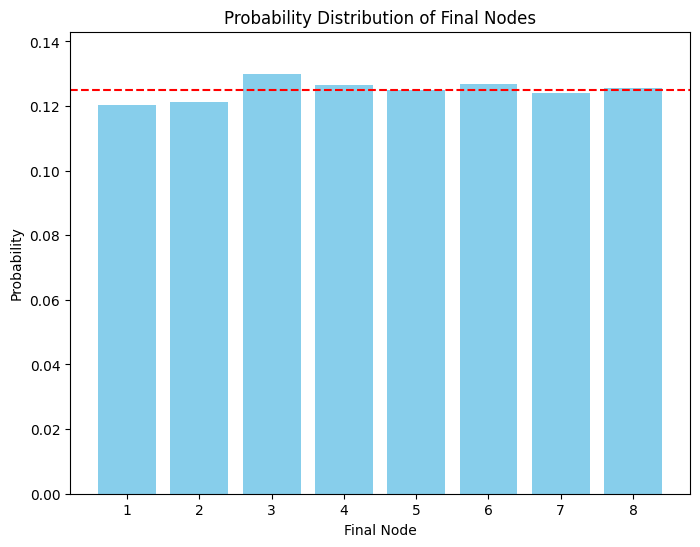

In [212]:
nodes = list(probs.keys())
values = list(probs.values())

# Plot the probabilities
plt.figure(figsize=(8, 6))
plt.bar(nodes, values, color='skyblue')
plt.axhline(y=1/8, color='red', linestyle='--')
plt.xlabel('Final Node')
plt.ylabel('Probability')
plt.title('Probability Distribution of Final Nodes')
plt.xticks(nodes)
plt.ylim(0, np.max(values)*1.1)

# Show the plot
plt.show()

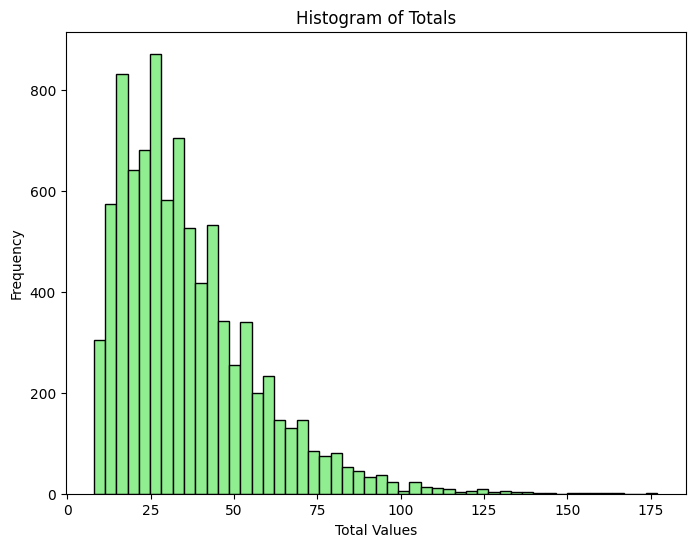

In [213]:
plt.figure(figsize=(8, 6))
plt.hist(totals, bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Total Values')
plt.ylabel('Frequency')
plt.title('Histogram of Totals')

# Show the plot
plt.show()

## **Visualizing a Stochastic Process**

In [214]:
# stochatic process
mtx = []
for i in range(10):
  positions = []
  stochastic_graph = Stochastic_Graph(10, 0.5)
  while stochastic_graph.check() == None:
    positions.append(stochastic_graph.move(ret = True))
  mtx.append(positions)

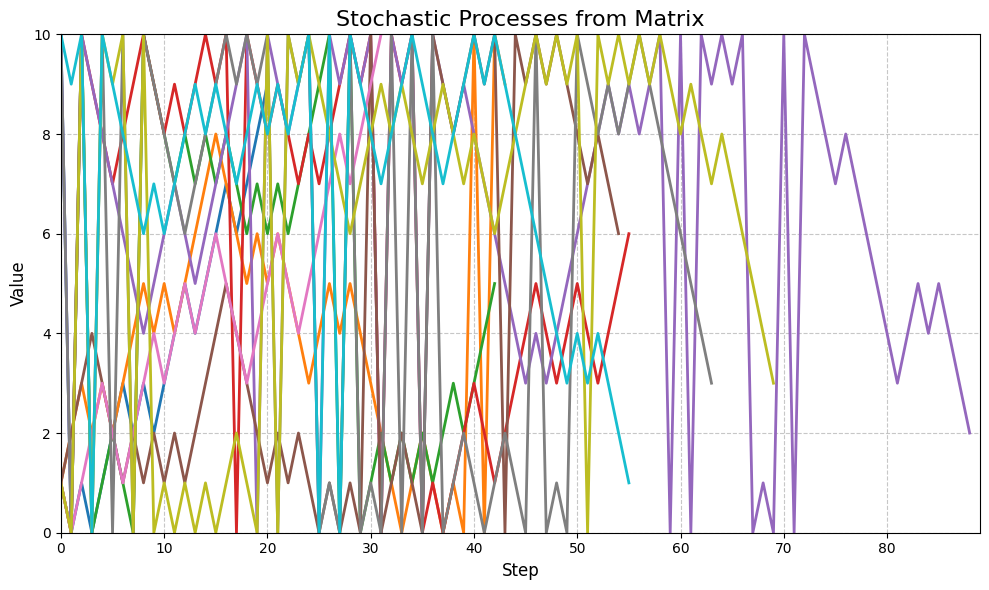

In [215]:
cmap = plt.get_cmap("tab10")

# Create the plot
plt.figure(figsize=(10, 6))

# Iterate over the rows in the matrix (each process) and plot with a color from the colormap
for i, data in enumerate(mtx):
    plt.plot(range(len(data)), data, color=cmap(i), linestyle='-', linewidth=2)  # Thicker lines, smooth style

# Add title and labels
plt.title('Stochastic Processes from Matrix', fontsize=16)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Customize the grid and background
plt.grid(True, linestyle='--', alpha=0.7)

# Add axis limits to make the plot more readable
plt.xlim(0, max(len(row) for row in mtx))
plt.ylim(min(min(row) for row in mtx), max(max(row) for row in mtx))

# Display the graph
plt.tight_layout()
plt.show()